# Скрипт построения диаграмм линейных и фазных напряжени

In [108]:
import numpy as np
import matplotlib.pyplot as plt


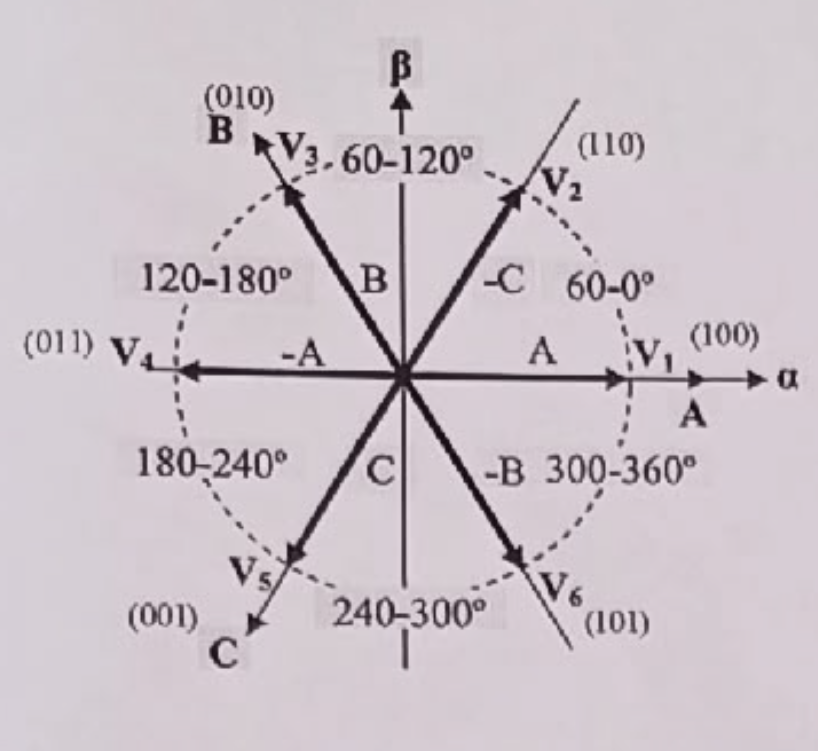

In [ ]:
M = 0.8 # Глубина модуляции
T = 1/24 # Шаг дискретизации
V1 = 1 # Первый смежный вектор 
V2 = 3 # Второй смежный вектор

In [110]:
SWITCHES = np.array([[1,0,0],[1,1,0],[0,1,0],[0,1,1],[0,0,1],[1,0,1],[1,0,0],[1,1,0],[0,1,0],[0,1,1],[0,0,1],[1,0,1]])

A_amp = []
B_amp = []
C_amp = []
V1 = V1-1
V2 = V2-1
for i in range(6):
    for _ in range(4):
        A_amp = np.append(A_amp, SWITCHES[i+V1,0]*2/3-SWITCHES[i+V1,1]*1/3-SWITCHES[i+V1,2]*1/3)
        A_amp = np.append(A_amp, SWITCHES[i+V2,0]*2/3-SWITCHES[i+V2,1]*1/3-SWITCHES[i+V2,2]*1/3)
        A_amp = np.append(A_amp, 0)
        B_amp = np.append(B_amp, -SWITCHES[i+V1,0]*1/3+SWITCHES[i+V1,1]*2/3-SWITCHES[i+V1,2]*1/3)
        B_amp = np.append(B_amp, -SWITCHES[i+V2,0]*1/3+SWITCHES[i+V2,1]*2/3-SWITCHES[i+V2,2]*1/3)
        B_amp = np.append(B_amp, 0)
        C_amp = np.append(C_amp, -SWITCHES[i+V1,0]*1/3-SWITCHES[i+V1,1]*1/3+SWITCHES[i+V1,2]*2/3)
        C_amp = np.append(C_amp, -SWITCHES[i+V2,0]*1/3-SWITCHES[i+V2,1]*1/3+SWITCHES[i+V2,2]*2/3)
        C_amp = np.append(C_amp, 0)


In [111]:
V1_grad = (V1)*np.pi/3
V2_grad = (V2)*np.pi/3
delta_grad = V2_grad-V1_grad

Vmax =M*2/3*np.sin(V2_grad-(V2_grad//(np.pi/2))*np.pi/2)

V=2/3

fi = 2*np.pi*T

teta_range = np.arange(0,delta_grad,fi)
DELTA = np.linalg.det([[V*np.cos(V1_grad), V*np.cos(V2_grad), 0],[V*np.sin(V1_grad), V*np.sin(V2_grad), 0],[1, 1, 1]])
DELTA_t11 = []
DELTA_t12 = []
for teta in teta_range:
    DELTA_t11 = np.append(DELTA_t11, np.linalg.det([[Vmax*np.cos(teta), V*np.cos(V2_grad), 0],[Vmax*np.sin(teta), V*np.sin(V2_grad), 0],[1, 1, 1]]))
    DELTA_t12 = np.append(DELTA_t12, np.linalg.det([[V*np.cos(V1_grad), Vmax*np.cos(teta), 0],[V*np.sin(V1_grad), Vmax*np.sin(teta), 0],[1, 1, 1]]))
print((V2_grad//(np.pi/2)))

2.0


In [112]:


time = []

for  _  in range(6):
    for i in range(4):
        """#time = np.append(time,M * np.sqrt(3)/2 * (np.cos(teta)-1/np.sqrt(3)*np.sin(teta)))
        time = np.append(time,M/2 * (np.cos(teta)+1/np.sqrt(3)*np.sin(teta)))
        time = np.append(time,M * 1/np.sqrt(3)*np.sin (teta))
        time = np.append(time,1-(M/2 * (np.cos(teta)+1/np.sqrt(3)*np.sin(teta)))-(M * 1/np.sqrt(3)*np.sin (teta)))"""
        time = np.append(time, DELTA_t11[i]/DELTA)
        time = np.append(time, DELTA_t12[i]/DELTA)
        time = np.append(time, 1-DELTA_t11[i]/DELTA-DELTA_t12[i]/DELTA)



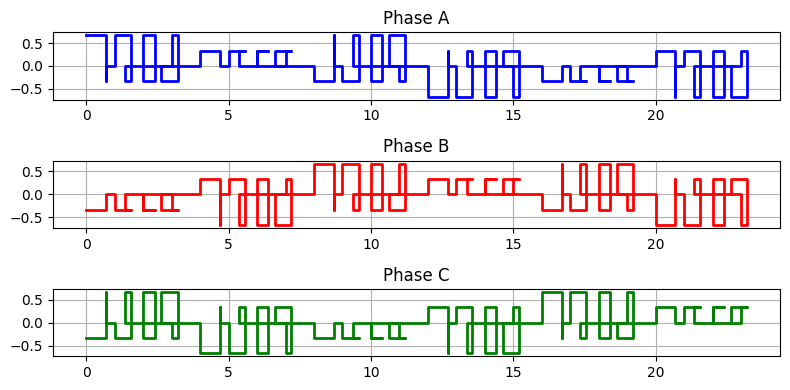

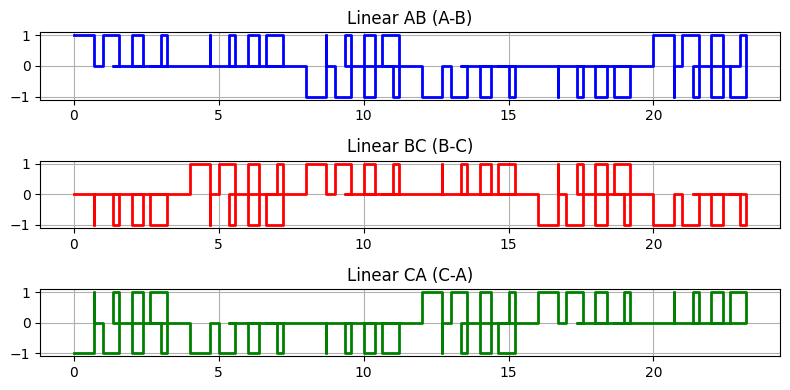

In [113]:
angle = np.arange(0, np.pi+1,  np.pi/12)
M = 0.7

tn1 = np.array([0.61, 0.49, 0.35, 0.18, 0.00, 0.49, 0.35, 0.18, 0.00, 0.49, 0.35, 0.18])
tn2 = np.array([0.00, 0.18, 0.35, 0.49, 0.61, 0.18, 0.35, 0.49, 0.61, 0.18, 0.35, 0.49])
tn0 = 1-tn1-tn2

time_start = []

x_starts = np.cumsum([0] + time[:-1])
x_starts = np.insert(x_starts,0,0)

fig, axes = plt.subplots(3, 1, figsize=(8, 4))

axes[0].step(x_starts, A_amp, where='post', linewidth=2, color='blue')
axes[0].set_title('Phase A')
axes[0].grid(True)

axes[1].step(x_starts, B_amp, where='post', linewidth=2, color='red')
axes[1].set_title('Phase B')
axes[1].grid(True)

axes[2].step(x_starts, C_amp, where='post', linewidth=2, color='green')
axes[2].set_title('Phase C')
axes[2].grid(True)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(8, 4))

axes[0].step(x_starts, A_amp-B_amp, where='post', linewidth=2, color='blue')
axes[0].set_title('Linear AB (A-B)')
axes[0].grid(True)

axes[1].step(x_starts, B_amp-C_amp, where='post', linewidth=2, color='red')
axes[1].set_title('Linear BC (B-C)')
axes[1].grid(True)

axes[2].step(x_starts, C_amp-A_amp, where='post', linewidth=2, color='green')
axes[2].set_title('Linear CA (C-A)')
axes[2].grid(True)

plt.tight_layout()
plt.show()